In [1]:
import pandas as pd

In [2]:
df = pd.read_table("biden_speech.rtf")

In [3]:
df

,{\rtf1\ansi\ansicpg1252\cocoartf2577
0,\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\...
1,{\colortbl;\red255\green255\blue255;\red0\gree...
2,{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
3,\paperw11900\paperh16840\margl1440\margr1440\v...
4,\deftab720
...,...
210,Sustained by faith.\
211,Driven by conviction.\
212,"And, devoted to one another and to this countr..."
213,May God bless America and may God protect our ...


In [4]:
df1 = df.drop(df.index[0:8])

In [5]:
df1.columns = ['text']

In [6]:
df1.head()

,text
8,This is America\'92s day.\
9,This is democracy\'92s day.\
10,A day of history and hope.\
11,Of renewal and resolve.\
12,Through a crucible for the ages America has be...


In [7]:
df1['text'] = df1['text'].str.replace("\\"," ")
df1['text'] = df1['text'].str.replace("}","")

In [8]:
df1

,text
8,This is America '92s day.
9,This is democracy '92s day.
10,A day of history and hope.
11,Of renewal and resolve.
12,Through a crucible for the ages America has be...
...,...
210,Sustained by faith.
211,Driven by conviction.
212,"And, devoted to one another and to this countr..."
213,May God bless America and may God protect our ...


In [10]:
#conda install -c conda-forge WordCloud

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.1            |   py38h96a0964_2         171 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         171 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py38h96a0964_2



wordcloud-1.8.1      | 171 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


## Main words in the text

In [26]:
df1['polarity'] = df1['text'].apply(polarity_calc)
df1['subjectivity'] = df1['text'].apply(subjectivity_calc)

In [27]:
Biden_sent = df1.sort_values(by='polarity', ascending=False)

In [28]:
Biden_sent

,text,sentiment,polarity,subjectivity
184,'93The work and prayers uc0 u8232 of centurie...,"(1.0, 0.3)",1.00,0.300
186,If we do this then when our days are through o...,"(1.0, 0.3)",1.00,0.300
149,I promise you this: as the Bible says weeping ...,"(0.8, 0.2)",0.80,0.200
73,"Through the Civil War, the Great Depression, W...","(0.8, 0.75)",0.80,0.750
101,Here we stand looking out to the great Mall wh...,"(0.8, 0.75)",0.80,0.750
...,...,...,...,...
55,Uniting to fight the common foes we face:,"(-0.3, 0.5)",-0.30,0.500
129,Recent weeks and months have taught us a painf...,"(-0.35, 0.575)",-0.35,0.575
188,They healed a broken land. uc0 u8232 My fellow...,"(-0.4, 0.4)",-0.40,0.400
86,"We have never, ever, ever failed in America wh...","(-0.5, 0.3)",-0.50,0.300


In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [20]:
def cloudword(text):
    try:
        text = ""
        for user,content in text.items():
            text += content
        fig,ax = plt.subplots(1,1,figsize=(8,8))
        wordcloud =  WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)
        plt.imshow(wordcloud)          
        plt.axis('off')
        plt.show()
    except:
        return None

In [ ]:
def cloudword(text):
    try:
        return WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)
    except:
        return None

TypeError: Image data of dtype object cannot be converted to float

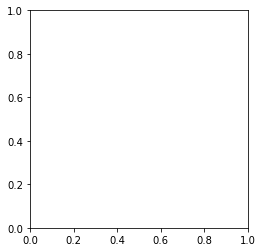

In [21]:
plt.imshow(cloudword)          
plt.axis('off')           
plt.show()